In [3]:
# Import the necessary libraries
import pandas as pd                               # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                                # Import numpy, linear algebra
import matplotlib.pyplot as plt                   # Import the library matplotlib and stored as an object plt#visualisation
import plotly.express as px                       
import plotly.graph_objects as go                 # Import the library for plotting graph
from plotly.subplots import make_subplots         # Import the library for plotting graph
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
import seaborn as sns; sns.set() 

from sklearn.preprocessing import scale           # Import the library scale
from sklearn.decomposition import PCA             # Import the library PCA
from sklearn.linear_model import LinearRegression  #Import LinearRegression

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')     # We can suppress the warnings


In [120]:
#Load raw data to df. df is an array where all records are stored
df = pd.read_csv("board_games.csv")

In [121]:
#df will be a numpy array of shape (10532, 22) having 10,532 samples each having 22 different attributes.
df.shape

(10532, 22)

In [122]:
# Display the first 2 rows and last 2 columns of the dataset and see what it looks like. 
df.head(2).append(df.tail(2))

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
10530,216201,The race is on for the robots of the Robo Rall...,//cf.geekdo-images.com/images/pic3374227.jpg,6,120,12,2,20,Robo Rally (2016),120,...,NaN,"Miniatures,Racing,Science Fiction",NaN,Richard Garfield,NaN,Robots,"Action / Movement Programming,Grid Movement,Mo...","Avalon Hill (Hasbro),Hasbro",7.45871,341
10531,216725,The deluxe edition comes in a double tall box ...,//cf.geekdo-images.com/images/pic3308211.jpg,5,60,14,1,30,Villages of Valeria: Deluxe Kickstarter Edition,60,...,Mihajlo Dimitrievski,"Card Game,City Building","Villages of Valeria,Villages of Valeria: Bard ...","Rick Holzgrafe,Isaias Vallejo",NaN,"Crowdfunding: Kickstarter,Tableau Building","Card Drafting,Hand Management",Daily Magic Games,7.52941,119


In [123]:
#Counts the number of data appears in df
df.count()

game_id           10532
description       10532
image             10531
max_players       10532
max_playtime      10532
min_age           10532
min_players       10532
min_playtime      10532
name              10532
playing_time      10532
thumbnail         10531
year_published    10532
artist             7759
category          10438
compilation         410
designer          10406
expansion          2752
family             7724
mechanic           9582
publisher         10529
average_rating    10532
users_rated       10532
dtype: int64

Use a bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars

Text(0.5, 1.0, 'Percent missing data by feature')

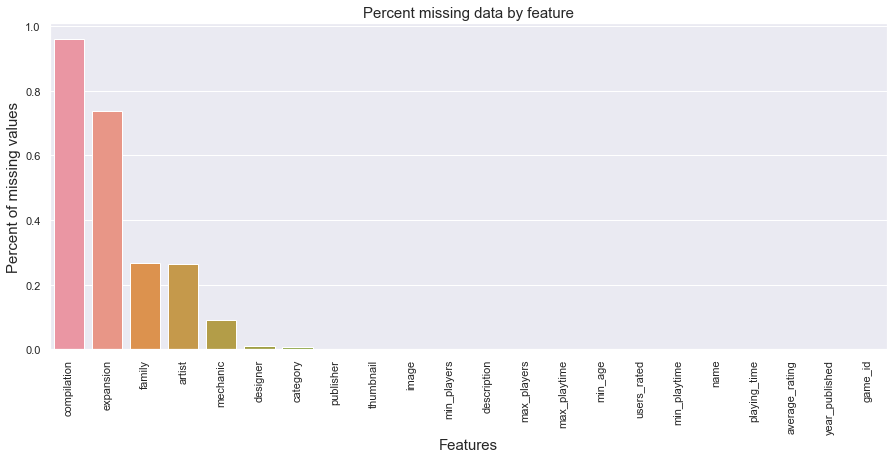

In [124]:
#Use .sum() function to sum missing values and stored in total
total =df.isnull().sum().sort_values(ascending=False)

#Caculate percent of missing values
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')

#Use se
sns.barplot(x=missing_data.index, y=missing_data['Percent'])

plt.xlabel('Features', fontsize=15)                       #Set x-axis name
plt.ylabel('Percent of missing values', fontsize=15)      #Set y-axis name
plt.title('Percent missing data by feature', fontsize=15) #Set title name

In [125]:
#Dropping the columns wiht high number of missing values
cols=['compilation','expansion','family','artist']
df.drop(cols,inplace=True ,axis=1)
df.count()

game_id           10532
description       10532
image             10531
max_players       10532
max_playtime      10532
min_age           10532
min_players       10532
min_playtime      10532
name              10532
playing_time      10532
thumbnail         10531
year_published    10532
category          10438
designer          10406
mechanic           9582
publisher         10529
average_rating    10532
users_rated       10532
dtype: int64

In [126]:
#Checking missing values
df.isnull().sum()

game_id             0
description         0
image               1
max_players         0
max_playtime        0
min_age             0
min_players         0
min_playtime        0
name                0
playing_time        0
thumbnail           1
year_published      0
category           94
designer          126
mechanic          950
publisher           3
average_rating      0
users_rated         0
dtype: int64

In [127]:
#Delete rows with at least 1 null value.
df =df.dropna(axis=0)

In [128]:
df.count()

game_id           9404
description       9404
image             9404
max_players       9404
max_playtime      9404
min_age           9404
min_players       9404
min_playtime      9404
name              9404
playing_time      9404
thumbnail         9404
year_published    9404
category          9404
designer          9404
mechanic          9404
publisher         9404
average_rating    9404
users_rated       9404
dtype: int64

In [129]:
#Checking Dublipacate values
duplicate =df[df.duplicated()]

#Counts the number of data appears in duplicate
duplicate.count()

game_id           0
description       0
image             0
max_players       0
max_playtime      0
min_age           0
min_players       0
min_playtime      0
name              0
playing_time      0
thumbnail         0
year_published    0
category          0
designer          0
mechanic          0
publisher         0
average_rating    0
users_rated       0
dtype: int64

In [130]:
df.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,9404.000000,9404.000000,9404.000000,9404.000000,9404.000000,9404.000000,9404.000000,9404.000000,9404.000000,9404.000000
mean,63227.168226,5.401850,97.475968,9.826350,2.060293,85.959592,97.475968,2003.286687,6.429076,945.940876
std,66279.068640,16.509851,697.807874,3.417576,0.662643,674.730019,697.807874,12.209631,0.834151,3035.424290
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5819.250000,4.000000,30.000000,8.000000,2.000000,30.000000,30.000000,1998.000000,5.893195,88.000000
50%,30878.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.444560,187.000000
75%,127935.250000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.993697,584.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


In [131]:
#Prepare dataframe for vizualization
prod_dev = df.category.value_counts().head(30).reset_index()
prod_dev.columns = ['category', 'Count']
prod_dev['prct'] = prod_dev['Count'] / sum(prod_dev['Count'])*100
#Create a barplot
fig = px.bar(prod_dev, y = 'Count', x = 'category', 
             height=800, title = 'Distribution of 30 most frequent developers', text = 'prct')

fig.update_xaxes(tickangle=45, showgrid=False)
fig.update_yaxes(gridcolor = '#00FFFF')
fig.update_layout(plot_bgcolor='white', title_x=0.5)
fig.update_traces(opacity = 1, marker_color = '#0000cc',
                 texttemplate='%{text:.2s}%', textposition='inside', 
                  outsidetextfont = {'color' : 'white', 'size' : 12}, textangle=0)

In [132]:
#Prepare dataframe for vizualization
prod_dev = df.designer.value_counts().head(30).reset_index()
prod_dev.columns = ['designer', 'Count']
prod_dev['prct'] = prod_dev['Count'] / sum(prod_dev['Count'])*100
#Create a barplot
fig = px.bar(prod_dev, y = 'Count', x = 'designer', 
             height=800, title = 'Distribution of 30 most frequent developers', text = 'prct')

fig.update_xaxes(tickangle=45, showgrid=False)
fig.update_yaxes(gridcolor = '#00FFFF')
fig.update_layout(plot_bgcolor='white', title_x=0.5)
fig.update_traces(opacity = 1, marker_color = '#0000cc',
                 texttemplate='%{text:.2s}%', textposition='inside', 
                  outsidetextfont = {'color' : 'white', 'size' : 12}, textangle=0)

## Part1

In [155]:
df.head(3)

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,category,designer,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,//cf.geekdo-images.com/images/pic159509_t.jpg,1986,"Economic,Negotiation,Political",Karl-Heinz Schmiel,"Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,//cf.geekdo-images.com/images/pic184174_t.jpg,1981,"Card Game,Fantasy","G. W. ""Jerry"" D'Arcey",Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,//cf.geekdo-images.com/images/pic3211873_t.jpg,1998,"Abstract Strategy,Medieval",Reiner Knizia,"Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019


#### What are the top 5 “average rated” games? 

In [133]:
top5=df.sort_values(by='average_rating', ascending=False).round(2).head(5)
cols=['name','average_rating']
top5[cols]

,name,average_rating
8348,Small World Designer Edition,9.00
6392,Kingdom Death: Monster,8.93
9964,Terra Mystica: Big Box,8.85
8526,Last Chance for Victory,8.85
9675,"The Greatest Day: Sword, Juno, and Gold Beaches",8.83


In [142]:
#Plot the distribution
fig = px.bar(top5.tail(5), x= 'name', y = 'average_rating', text = 'name', template = 'gridon', title = 'Top 5 Games')
fig.update_yaxes(showgrid=False)
fig.update_layout(uniformtext_minsize = 8)
fig.update_traces(textposition = 'inside', opacity = 1, marker_color = '#0000ff')

#### Is there a correlation between the “users_rated” and the “max_playtime”? 

In [135]:
fig = px.scatter(df, y="users_rated", x="max_playtime", trendline="ols")
fig.show()

In [136]:
import scipy.stats
x=df['max_playtime']
y=df['users_rated']

corr= np.corrcoef(x,y)
pear= scipy.stats.pearsonr(x, y)    # Pearson's r
spear=scipy.stats.spearmanr(x, y)   # Spearman's rho
print('Correlation coefficients :',corr)
print('pearsonr:',pear)
print('spearmar',spear)


Correlation coefficients : [[ 1.         -0.00642603]
 [-0.00642603  1.        ]]
pearsonr: (-0.006426030756960778, 0.5332300213516221)
spearmar SpearmanrResult(correlation=0.07375887118876602, pvalue=7.979065978732815e-13)


 We can see that the two variables are negative correlated and that the correlation is -0.006. 

#### What is the distribution of game categories? 

In [137]:
#Gather all genres into one string
genres = df['category'].str.cat(sep = ', ')
#Split the genres and put in into pandas series
data = pd.Series(genres.split(', '))
#Count unique values and put it into dataframe
genres = pd.DataFrame(data.value_counts())
#Reset index
genres = genres.reset_index()
#Change column names
genres.columns = ['category', 'Count']
#Drop general genres and sort the dataframe in ascending order
genres = genres.query('category != "Games" and category != "Strategy" and category != "Entertainment"').sort_values('Count',
                                                                                                           ascending=True)

In [138]:
#Plot the distribution
fig = px.bar(genres.tail(10), y = 'category', x = 'Count', text = 'Count', template = 'gridon', title = 'Distribution of category')
fig.update_yaxes(showgrid=False)
fig.update_layout(uniformtext_minsize = 8)
fig.update_traces(textposition = 'inside', opacity = 1, marker_color = '#387357')

In [139]:
#Prepare dataframe for vizualization
prod_dev = df.category.value_counts().head(30).reset_index()
prod_dev.columns = ['category', 'Count']
prod_dev['prct'] = prod_dev['Count'] / sum(prod_dev['Count'])*100
#Create a barplot
fig = px.bar(prod_dev, y = 'Count', x = 'category', 
             height=800, title = 'Distribution of 30 most frequent developers', text = 'prct')

fig.update_xaxes(tickangle=45, showgrid=False)
fig.update_yaxes(gridcolor = '#00FFFF')
fig.update_layout(plot_bgcolor='white', title_x=0.5)
fig.update_traces(opacity = 1, marker_color = '#0000cc',
                 texttemplate='%{text:.2s}%', textposition='inside', 
                  outsidetextfont = {'color' : 'white', 'size' : 12}, textangle=0)

#### Do older games (1992 and earlier) have a higher MEAN “average rating” than newer games (after 1992)? 


In [143]:
#Select data 1992 - 2020 to analyse
y_1992=df.loc[( df['year_published'] <=1992 )]
y_1992['average_rating'].mean()


6.079826142606661

In [144]:
#Select data 1992 - 2020 to analyse
after1992=df.loc[( df['year_published'] >=1992 )]
after1992['average_rating'].mean()


6.5030898592270345

#### What are the 3 most common “mechanics” in the dataset? 

In [153]:
 df.mechanic.value_counts().head(3)

Hex-and-Counter    522
Hand Management    292
Dice Rolling       211
Name: mechanic, dtype: int64

## Part 2
 You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the 
dataset, that has not been asked in Part 1. This must have a logical basis that enhances the 
information gained in the scenario.

In [171]:
top5=df.sort_values(by='average_rating', ascending=False).round(3).head(10)
cols=['name','average_rating','min_age','max_players','max_playtime','min_age','min_playtime','year_published','publisher']
top5[cols]

,name,average_rating,min_age,max_players,max_playtime,min_age,min_playtime,year_published,publisher
8348,Small World Designer Edition,9.004,8,6,80,8,40,2015,Days of Wonder
6392,Kingdom Death: Monster,8.932,17,6,180,17,60,2015,Kingdom Death
9964,Terra Mystica: Big Box,8.849,12,5,150,12,60,2015,"Feuerland Spiele,Korea Boardgames co., Ltd."
8526,Last Chance for Victory,8.846,15,2,60,15,60,2014,Multi-Man Publishing
9675,"The Greatest Day: Sword, Juno, and Gold Beaches",8.831,12,8,6000,12,60,2015,Multi-Man Publishing
9867,Last Blitzkrieg,8.803,13,4,960,13,180,2016,Multi-Man Publishing
6724,Enemy Action: Ardennes,8.758,0,2,600,0,0,2015,Compass Games
10001,Through the Ages: A New Story of Civilization,8.742,14,4,240,14,180,2015,"Cranio Creations,Czech Games Edition,Devir,Dic..."
6543,1817,8.708,16,7,540,16,360,2010,"All-Aboard Games,Deep Thought Games, LLC"
9242,Pandemic Legacy: Season 1,8.669,13,4,60,13,60,2015,"Z-Man Games,Asterion Press,Devir,Filosofia Édi..."


In [164]:
df.loc[(df['average_rating']>=9)]

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,thumbnail,year_published,category,designer,mechanic,publisher,average_rating,users_rated
8348,140135,Small World's Designer Edition is a spare-no-e...,//cf.geekdo-images.com/images/pic2270432.jpg,6,80,8,2,40,Small World Designer Edition,80,//cf.geekdo-images.com/images/pic2270432_t.jpg,2015,"Civilization,Fantasy,Territory Building",Philippe Keyaerts,"Area Control / Area Influence,Area Movement,Di...",Days of Wonder,9.00392,180
